In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Reading DF with correct datatypes

In [2]:
df = pd.read_csv('Datasets/DF_ML_Ready.csv')
df = pd.read_csv('Datasets/DF_ML_Ready_WeekCases.csv')
#df['ETA']= pd.to_datetime(df['ETA'],format="%Y-%m-%d %H:%M")
#df['ATA']= pd.to_datetime(df['ATA'],format="%Y-%m-%d %H:%M")
df['Days_Before_ETA_Info'] = df['Days_Before_ETA_Info'].astype('int64')


# Droping Irrelavent Coloums and Outliers

In [3]:
df.drop(['ETA'] ,axis=1, inplace=True)
df.drop(['ATA'] ,axis=1, inplace=True)
#df.drop(['ETA_Day'] ,axis=1, inplace=True)
#df.drop(['Vessel_Name'] ,axis=1, inplace=True)
df.drop(['Ship_ID'] ,axis=1, inplace=True)
df.drop(['date'] ,axis=1, inplace=True)

df = df[df.Days_Before_ETA_Info >= 0]  #droping value for negative Days_Before_ETA_Info 
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [4]:
df[['Delay', 'Built_Year', 'Days_Before_ETA_Info', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Hour','new_cases']].corr()
#df[['Delay','Size', 'Dwt', 'Size']].corr()

,Delay,Built_Year,Days_Before_ETA_Info,ETA_Year,ETA_Month,ETA_Weekday,ETA_Hour,new_cases
Delay,1.000000,0.097592,0.175204,0.112164,-0.114388,0.140029,-0.009474,0.128013
Built_Year,0.097592,1.000000,0.102188,-0.105458,0.007841,0.049497,0.062235,-0.028814
Days_Before_ETA_Info,0.175204,0.102188,1.000000,-0.086272,0.208921,0.003800,0.066587,0.187386
ETA_Year,0.112164,-0.105458,-0.086272,1.000000,-0.687369,0.067647,-0.004279,0.300959
ETA_Month,-0.114388,0.007841,0.208921,-0.687369,1.000000,-0.021412,-0.038607,0.044926
ETA_Weekday,0.140029,0.049497,0.003800,0.067647,-0.021412,1.000000,-0.023286,0.106013
ETA_Hour,-0.009474,0.062235,0.066587,-0.004279,-0.038607,-0.023286,1.000000,-0.046357
new_cases,0.128013,-0.028814,0.187386,0.300959,0.044926,0.106013,-0.046357,1.000000


In [5]:
#Converting to days and rouding.
df['Delay']=df['Delay']/60
#df['Delay']=df['Delay']/24
#df['Delay']=df['Delay']/1440 #60*24

df['Delay']=df['Delay'].round(0)

# Ploting to vizualize relation between X_Features and Delay

In [6]:
# Only using Days fore ETA 10days
#df=df.loc[df['Days_Before_ETA_Info'] < 5]
#df=df.loc[df['Delay'] > -1]


# Converting Delay to Catagorical

In [7]:
#add a new column category next to the age group. 
#'''
#For 3 Class
Delay_Cat = pd.cut(df.Delay,bins=[-9999,-12,12,9999],labels=['Early','OnTime','Late'])

#For 2 Class
#Delay_Cat = pd.cut(df.Delay,bins=[-9999,24,9999],labels=['OnTime','Late'])

df.insert(4,'Delay_Cat',Delay_Cat)
df.drop(['Delay'] ,axis=1, inplace=True)
df = df.rename(columns={'Delay_Cat': 'Delay'})
df['Delay']=df['Delay'].astype('category')

del Delay_Cat
#'''
df=df[df.Delay != 'Early']

In [8]:
#len(df[df['Delay'] == 'Early'])

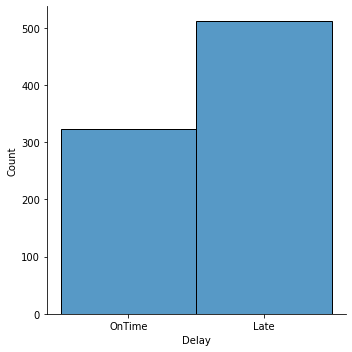

In [9]:
sns.displot(df, x="Delay",binwidth=1)

# Normalizing Continious Data

In [10]:
df['Size'] = (df['Size'] - df['Size'].min()) / (df['Size'].max()- df['Size'].min())

df['Days_Before_ETA_Info'] = (df['Days_Before_ETA_Info'] - df['Days_Before_ETA_Info'].min()) / (df['Days_Before_ETA_Info'].max()- df['Days_Before_ETA_Info'].min())

df['new_cases'] = (df['new_cases'] - df['new_cases'].min()) / (df['new_cases'].max()- df['new_cases'].min())



In [11]:
#from feature_engine.creation import CyclicalTransformer
#cyclical = CyclicalTransformer(variables=None, drop_original=False)
#abc = cyclical.fit_transform(df[['ETA_Month']])
df['ETA_Month_sin'] = np.sin(2 * np.pi * df['ETA_Month']/12.0)
df['ETA_Month_cos'] = np.cos(2 * np.pi * df['ETA_Month']/12.0)

df['ETA_Weekday_sin'] = np.sin(2 * np.pi * df['ETA_Weekday']/7.0)
df['ETA_Weekday_cos'] = np.cos(2 * np.pi * df['ETA_Weekday']/7.0)

df['ETA_Hour_sin'] = np.sin(2 * np.pi * df['ETA_Hour']/24.0)
df['ETA_Hour_cos'] = np.cos(2 * np.pi * df['ETA_Hour']/24.0)

df['Built_Month_sin'] = np.sin(2 * np.pi * df['Built_Month']/12.0)
df['Built_Month_cos'] = np.cos(2 * np.pi * df['Built_Month']/12.0)

df['ETA_Day_sin'] = np.sin(2 * np.pi * df['ETA_Day']/31)
df['ETA_Day_cos'] = np.cos(2 * np.pi * df['ETA_Day']/31)




In [12]:
#Without Cos And Sin
df=df[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Day', 'ETA_Hour', 'Built_Year', 'Built_Month', 'Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

##For Cosine
#df=df[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos','ETA_Hour_sin','ETA_Hour_cos', 'Built_Year', 'Built_Month_sin', 'Built_Month_cos','Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

# Converting DF to Label Encoding

In [13]:
df_Lab_enc=df.copy()

#Selecting Only Catogorail Varible to label encode
Attribute_Name = ['Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']


label_encoder = preprocessing.LabelEncoder()
for name in Attribute_Name:
    df_Lab_enc[name]= label_encoder.fit_transform(df_Lab_enc[name])

#Attributes to keep for DT and RF Models


df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month', 'ETA_Weekday','ETA_Day', 'ETA_Hour', 'Built_Year', 'Built_Month', 'Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

#For Cosine
#df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Year', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos','ETA_Hour_sin','ETA_Hour_cos', 'Built_Year', 'Built_Month_sin', 'Built_Month_cos','Alternative_Fuel', 'SOx_Scrubber', 'Eco_Engine', 'Vessel_Name','Service',  'Builder', 'Owner', 'Flag', 'Berth', 'Side','NextPort']]

#df Optimised
#df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Month_sin','ETA_Month_cos', 'ETA_Weekday_sin','ETA_Weekday_cos','ETA_Day_sin', 'ETA_Day_cos', 'ETA_Hour_sin','ETA_Hour_cos', 'Owner','NextPort']]
df_Lab_enc=df_Lab_enc[['Delay', 'Size', 'Days_Before_ETA_Info', 'new_cases', 'ETA_Month','ETA_Weekday','ETA_Day',  'ETA_Hour', 'Owner','NextPort']]


del Attribute_Name
del label_encoder
del name

# Model Testing

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

testsize=0.3
rnseed=1


In [15]:
print(len(df[df['Delay'] == 'Early']))

0


# Random Forest

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


x = df_Lab_enc.drop('Delay',axis=1)

y = df_Lab_enc['Delay']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

y_pred_train=rf.predict(x_train)


#Evaluating the Algorithm
print("Train Data:")
print('Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
#----------------
print("Test Data:")
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))




Train Data:
Accuracy: 1.0
Test Data:
Accuracy: 0.8007968127490039


In [17]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
results=cross_validate(rf,df_Lab_enc.drop('Delay',axis=1),df_Lab_enc['Delay'],cv=10, scoring=scoring)

In [18]:
print(results['test_accuracy'].mean())
results['test_f1_macro'].mean()

0.6674842226047046


0.622239333956246

# For Traning

In [19]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_train, y_pred_train)))

print('Micro Precision: {:.2f}'.format(precision_score(y_train, y_pred_train, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_train, y_pred_train, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_train, y_pred_train, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_train, y_pred_train, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_train, y_pred_train, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_train, y_pred_train, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_train, y_pred_train, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_train, y_pred_train, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_train, y_pred_train, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, y_pred_train, target_names=['Late', 'OnTime']))




Confusion Matrix

[[133  19]
 [ 31  68]]

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

        Late       1.00      1.00      1.00       360
      OnTime       1.00      1.00      1.00       225

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



# For Testing

In [20]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Late', 'OnTime']))




Confusion Matrix

[[133  19]
 [ 31  68]]

Accuracy: 0.80

Micro Precision: 0.80
Micro Recall: 0.80
Micro F1-score: 0.80

Macro Precision: 0.80
Macro Recall: 0.78
Macro F1-score: 0.79

Weighted Precision: 0.80
Weighted Recall: 0.80
Weighted F1-score: 0.80

Classification Report

              precision    recall  f1-score   support

        Late       0.81      0.88      0.84       152
      OnTime       0.78      0.69      0.73        99

    accuracy                           0.80       251
   macro avg       0.80      0.78      0.79       251
weighted avg       0.80      0.80      0.80       251



In [21]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Late,OnTime,All
True,,,
OnTime,31,68,99
Late,133,19,152
All,164,87,251


<AxesSubplot:>

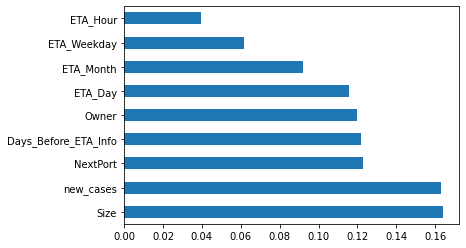

In [22]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(99).plot(kind='barh')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


x = df_Lab_enc.drop('Delay',axis=1)

y = df_Lab_enc['Delay']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)
store_n_acc=[]
for i in range(1,500):
    rf = RandomForestClassifier(n_estimators = i,random_state = 0)

    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    y_pred_train=rf.predict(x_train)

    
    #Evaluating the Algorithm
    print("Train Data:")
    print('Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
    #----------------
    print("Test Data:")
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    store_n_acc.append([i, metrics.accuracy_score(y_test, y_pred)])

Train Data:
Accuracy: 0.852991452991453
Test Data:
Accuracy: 0.7171314741035857
Train Data:
Accuracy: 0.8717948717948718
Test Data:
Accuracy: 0.7330677290836654
Train Data:
Accuracy: 0.9230769230769231
Test Data:
Accuracy: 0.7569721115537849
Train Data:
Accuracy: 0.9247863247863248
Test Data:
Accuracy: 0.7729083665338645
Train Data:
Accuracy: 0.9572649572649573
Test Data:
Accuracy: 0.7848605577689243
Train Data:
Accuracy: 0.9521367521367521
Test Data:
Accuracy: 0.7729083665338645
Train Data:
Accuracy: 0.958974358974359
Test Data:
Accuracy: 0.7808764940239044
Train Data:
Accuracy: 0.9641025641025641
Test Data:
Accuracy: 0.7649402390438247
Train Data:
Accuracy: 0.9709401709401709
Test Data:
Accuracy: 0.7848605577689243
Train Data:
Accuracy: 0.976068376068376
Test Data:
Accuracy: 0.7768924302788844
Train Data:
Accuracy: 0.9743589743589743
Test Data:
Accuracy: 0.796812749003984
Train Data:
Accuracy: 0.9794871794871794
Test Data:
Accuracy: 0.7808764940239044
Train Data:
Accuracy: 0.98632478

<AxesSubplot:>

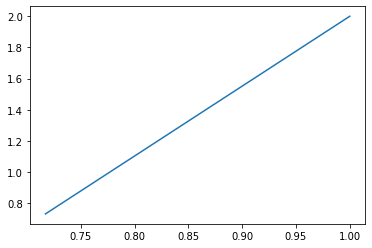

In [48]:
x_value=[]
y_value=[]
for i,j in store_n_acc:
    x_value.append(i)
    y_value.append(j)


Text(0, 0.5, 'Accuracy')

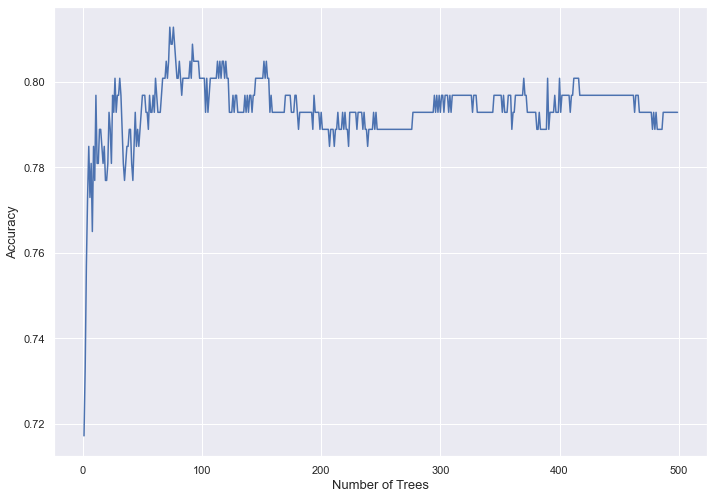

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.lineplot(x=x_value,y=y_value, )
#p = sns.lineplot(data = df)
fig.set_xlabel("Number of Trees", fontsize = 13)
fig.set_ylabel("Accuracy", fontsize = 13)